In [1]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [15]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


### Prepare the Data

In [17]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df[["price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"]])

In [21]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=["price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"])

# Copy the crypto names from the original data
crypto_names_df = pd.DataFrame(market_data_df.index).copy()


# Set the coinid column as index
crypto_names_df.set_index('coin_id', inplace=True)

# Display sample data
print(scaled_data_df.head())


   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                     0.008005                     -0.55

### Find the Best Value for k Using the Original Scaled DataFrame.

In [25]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data_df)
    inertia_values.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k_values, 'inertia':inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

    k     inertia
0   1  287.000000
1   2  212.123342
2   3  123.190482
3   4  105.399719
4   5   66.427649
5   6   61.837035
6   7   50.549254
7   8   41.923348
8   9   37.819709
9  10   28.520905


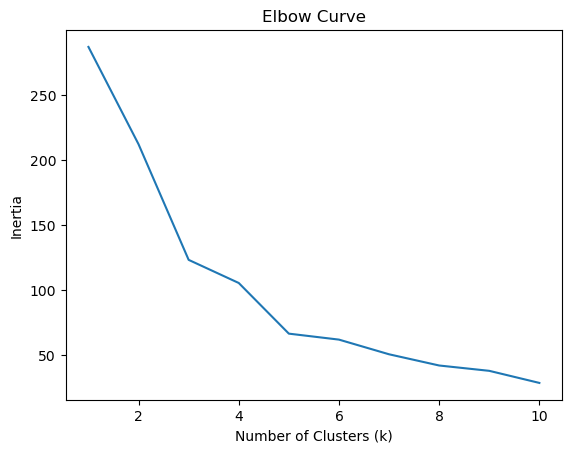

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.plot('k', 'inertia', data=elbow_df)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
the optimal k value is between 3 and 5

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [27]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [28]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=42)

In [29]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_data_df)

# View the resulting array of cluster values.
scaled_data_df['cluster'] = clusters

In [30]:
# Create a copy of the DataFrame
crypto_data_with_clusters = scaled_data_df.copy()


In [31]:
# Add a new column to the DataFrame with the predicted clusters
crypto_data_with_clusters['cluster'] = clusters

# Display sample data
crypto_data_with_clusters.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


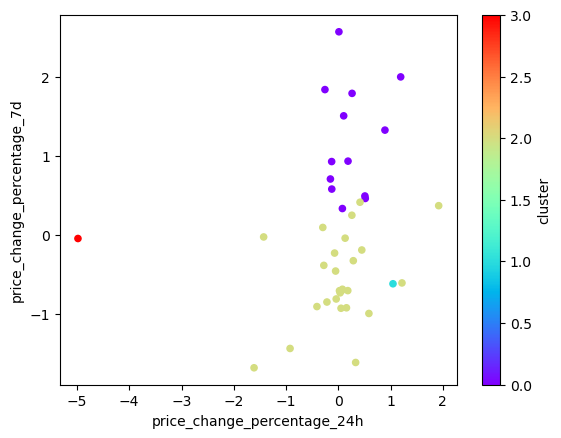

In [34]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
crypto_data_with_clusters.plot.scatter(x='price_change_percentage_24h',y='price_change_percentage_7d',c='cluster',cmap='rainbow')
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [36]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [37]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_data_df)

# View the first five rows of the DataFrame. 
pca_data[:5]

array([[-1.58513942,  0.13439444,  0.545621  ],
       [-1.32258066,  0.05449393,  1.11570854],
       [ 0.26633536, -0.53640937, -0.79694588],
       [ 0.25722513, -0.59201286, -0.6465287 ],
       [-2.95224985,  0.42237155,  1.26789353]])

In [38]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
total_explained_variance = sum(pca.explaned_variance_ratio_)
print(f"Total explained variance of the three principal components:{total_explained_variance:.2f}")


[0.37005408 0.32322221 0.19115222]


AttributeError: 'PCA' object has no attribute 'explaned_variance_ratio_'

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [41]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PCA1','PCA2','PCA3'])

# Copy the crypto names from the original data
pca_df['coin_id'] = scaled_data_df['coin_id']

# Set the coinid column as index for the new DataFrame
pca_df.set_index('coin_id', inplace=True)

# Display sample data
print(pca_df.head())

KeyError: 'coin_id'

### Find the Best Value for k Using the PCA Data

In [42]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(pca_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.007838
1,2,198.675508
2,3,119.704019
3,4,43.205879
4,5,33.042435
5,6,24.347640
6,7,21.723241
7,8,19.785418
8,9,16.206791
9,10,9.482300


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

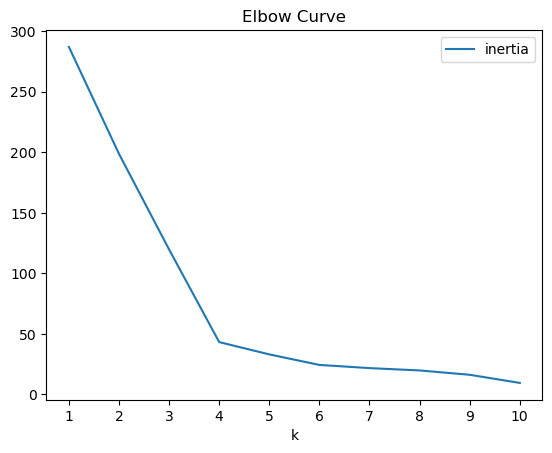

In [43]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                    y="inertia",
                    title="Elbow Curve",
                    xticks=k)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
the best K value is 4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  Not much

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [44]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [45]:
# Fit the K-Means model using the PCA data
model.fit(pca_df)

KMeans(n_clusters=4, random_state=1)

In [46]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(pca_df)

# Print the resulting array of cluster values.
k_4

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [47]:
# Create a copy of the DataFrame with the PCA data
k_4_pca_data_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
k_4_pca_data_df['k4'] = k_4

# Display sample data
k_4_pca_data_df.head()

,PCA1,PCA2,PCA3,k4
0,-1.585139,0.134394,0.545621,1
1,-1.322581,0.054494,1.115709,1
2,0.266335,-0.536409,-0.796946,0
3,0.257225,-0.592013,-0.646529,0
4,-2.952250,0.422372,1.267894,1


In [48]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
k_4_pca_data_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="k4",
    title = "Scatter Plot by PCA segment k=4",
    colormap='rainbow'
)

:Scatter   [PCA1]   (PCA2,k4)

### Determine the Weights of Each Feature on each Principal Component

In [49]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.weights = pd.DataFrame(pca.components_.T, columns=['PCA1','PCA2','PCA3'], index=scaled_data_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.437936,-0.146912,-0.367081
price_change_percentage_7d,-0.346144,0.081123,0.589043
price_change_percentage_14d,-0.434764,0.314075,0.112155
price_change_percentage_30d,-0.262153,0.468854,-0.306089
price_change_percentage_60d,-0.068282,0.492046,-0.408300
price_change_percentage_200d,0.294911,0.503435,0.112395
price_change_percentage_1y,0.384558,0.386429,0.300538
cluster,0.437188,-0.092117,-0.377289


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    ??????